In [2]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
from datetime import *
quandl.ApiConfig.api_key = 'mJs8xCEDp9WGJ95NaKNZ'

# 图一 加密货币汇率的极端波动

In [3]:
USD=quandl.get('BCHARTS/BITSTAMPUSD',start_date='2012-12-01',end_date='2015-05-31')

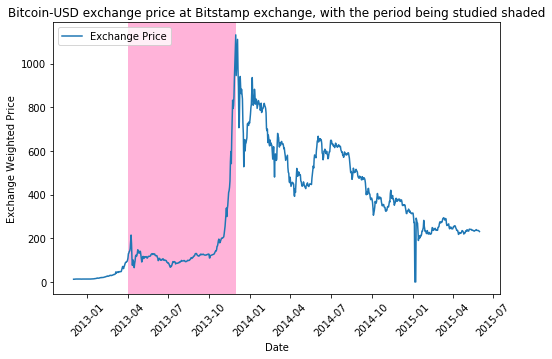

In [15]:
USD=USD.reset_index()
fig=plt.figure(figsize=(8,5))

plt.plot(USD['Date'], USD['Weighted Price'], label='Exchange Price')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Exchange Weighted Price')
plt.title('Bitcoin-USD exchange price at Bitstamp exchange, with the period being studied shaded')
plt.axvspan('2013-4-01', '2013-12-01', facecolor='#FF69B4', alpha=0.5)
plt.show()

# 划分账户种类

In [3]:
# 获取Mtgox JPY/BTC 价格
mtgoxUSD=quandl.get('BCHARTS/MTGOXUSD',start_date='2011-04-01',end_date='2012-12-31')
mtgoxUSD


,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2011-04-01,0.78461,0.79697,0.77410,0.77411,3186.767000,2483.687530,0.779375
2011-04-02,0.77500,0.79980,0.77410,0.78199,2493.595000,1965.232797,0.788112
2011-04-03,0.78199,0.79487,0.77700,0.77900,3931.385000,3074.755742,0.782105
2011-04-04,0.78000,0.78500,0.56190,0.68000,31155.458000,21652.688352,0.694989
2011-04-05,0.68000,0.74784,0.58000,0.71000,9730.303000,6522.714489,0.670351
2011-04-06,0.74770,0.75000,0.69020,0.74000,8703.946000,6264.040339,0.719678
2011-04-07,0.74800,0.78491,0.72050,0.75380,10832.992000,8178.141505,0.754929
2011-04-08,0.75380,0.79900,0.73090,0.74999,18207.300000,13854.662261,0.760940
2011-04-09,0.74999,0.76760,0.72050,0.73000,12119.397000,8940.961038,0.737740


In [7]:
pre='12'
xlsname=pd.ExcelWriter(pre+'fen.xlsx')

In [4]:
# 读入待划分数据
f=open('12处理完毕.csv')
data=pd.read_csv(f)
data['Date']=pd.to_datetime(data['Date'].astype('datetime64[D]',format ='%Y-%m-%d'))
data.head()

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Bitcoins,Currency,Date,Money_JPY,Money_Rate,Trade_Id,Type,User_Id
0,23.02,USD,2011-04-01,1495.146203,82.783135,35372,buy,3931
1,23.02,USD,2011-04-01,1495.146203,82.783135,35372,sell,895
2,10.00,USD,2011-04-01,645.708454,82.783135,35373,buy,722
3,10.00,USD,2011-04-01,645.708454,82.783135,35373,sell,895
4,35.00,USD,2011-04-01,2259.979588,82.783135,35374,buy,3605


In [6]:
grouped = data.pivot_table('Money_Rate',index='Date',columns='Currency')
Rate = grouped.USD
c = pd.DataFrame([Rate]).T
df = pd.merge(data,c,left_on=data.Date, right_index=True)
df['Money_USD']=df['Money_JPY']/df['USD']
df.drop(['key_0'], axis=1, inplace=True)
df['Price']=df['Money_USD']/df['Bitcoins']

In [7]:
mtg=mtgoxUSD[['High','Low']]
mtg.High=mtg.High*1.5
mtg.Low=mtg.Low*0.5
last = pd.merge(df,mtg,left_on=df.Date,right_index=True)
last.drop(['key_0','Currency','Money_JPY','Money_Rate','USD'], axis=1, inplace=True)

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [22]:
last

,Bitcoins,Date,Trade_Id,Type,User_Id,Money_USD,Price,High,Low
0,23.020000,2011-04-01,35372,buy,3931,18.061000,0.784579,1.195455,0.38705
1,23.020000,2011-04-01,35372,sell,895,18.061000,0.784579,1.195455,0.38705
2,10.000000,2011-04-01,35373,buy,722,7.800000,0.780000,1.195455,0.38705
3,10.000000,2011-04-01,35373,sell,895,7.800000,0.780000,1.195455,0.38705
4,35.000000,2011-04-01,35374,buy,3605,27.300000,0.780000,1.195455,0.38705
5,35.000000,2011-04-01,35374,sell,895,27.300000,0.780000,1.195455,0.38705
6,10.600000,2011-04-01,35375,buy,3966,8.246000,0.777925,1.195455,0.38705
7,10.600000,2011-04-01,35375,sell,895,8.246000,0.777925,1.195455,0.38705
8,176.214000,2011-04-01,35376,buy,3353,136.920000,0.777010,1.195455,0.38705
9,176.214000,2011-04-01,35376,sell,895,136.920000,0.777010,1.195455,0.38705


In [16]:
EHA=last[last.Price>last.High]
ELA=last[last.Price<last.Low]
# NMA=last[(last.Price>=last.Low)&(last.Price<=last.High)]
# NMA

In [14]:
EHA_list=list(set(EHA.User_Id.values))#制作列表并且去重
ELA_list=list(set(ELA.User_Id.values))#制作列表并且去重
print('EHA账户有%s'%len(EHA_list))
print('ELA账户有%s'%len(ELA_list))
#转出CSV表
pd.DataFrame(EHA_list).to_csv('EHA_list12.csv', sep = ',', header = None,index = False)

EHA账户有239
ELA账户有498


## 合并EHA账户,并且去重

In [49]:
EHA_list12=pd.read_csv('EHA_list12.csv',header=None)
EHA_list13=pd.read_csv('EHA_list13.csv',header=None)
EHA_all=list(EHA_list12[0])+list(EHA_list13[0])
EHA_all=list(set(EHA_all))
len(EHA_all)

2649

## 找出EHA账户11-12年交易的所有内容

In [50]:
EHA_trade=last[last['User_Id'].isin(EHA_all
                                   )]
EHA_trade

,Bitcoins,Date,Trade_Id,Type,User_Id,Money_USD,Price,High,Low
1376256,10.000000,2011-09-29,1317317043059908,buy,69334,47.300000,4.730000,7.2000,2.33710
1376258,0.170000,2011-09-29,1317317056551900,buy,69334,0.805800,4.740000,7.2000,2.33710
1376259,0.170000,2011-09-29,1317317056551900,sell,25337,0.805800,4.740000,7.2000,2.33710
1376260,4.770280,2011-09-29,1317317056616366,buy,69334,22.620380,4.741940,7.2000,2.33710
1376261,4.770280,2011-09-29,1317317056616366,sell,69191,22.620380,4.741940,7.2000,2.33710
1376262,0.377100,2011-09-29,1317317165742361,buy,69334,1.788400,4.742509,7.2000,2.33710
1376263,0.377100,2011-09-29,1317317165742361,sell,69398,1.788400,4.742509,7.2000,2.33710
1376264,0.154220,2011-09-29,1317317179665199,buy,69334,0.731600,4.743872,7.2000,2.33710
1376265,0.154220,2011-09-29,1317317179665199,sell,67861,0.731600,4.743872,7.2000,2.33710
1376266,1.740007,2011-09-29,1317317179763717,buy,69334,8.256320,4.744993,7.2000,2.33710


## 像处理数据那样，去掉只有sell，或者只有buy的交易，然后setindex
## 得到EHA账户交易的所有完整交易

In [51]:
EHA_trade_grouped12=EHA_trade.pivot_table('Date',index='Trade_Id',columns='Type',aggfunc=len) 
EHA_trade_grouped12=EHA_trade_grouped12[(EHA_trade_grouped12['buy']==1) & (EHA_trade_grouped12['sell']==1)]
EHA_trade_end=EHA_trade[EHA_trade["Trade_Id"].isin(EHA_trade_grouped12.index)]
EHA_trade_end

,Bitcoins,Date,Trade_Id,Type,User_Id,Money_USD,Price,High,Low
1376258,0.170000,2011-09-29,1317317056551900,buy,69334,0.805800,4.740000,7.2000,2.33710
1376259,0.170000,2011-09-29,1317317056551900,sell,25337,0.805800,4.740000,7.2000,2.33710
1376260,4.770280,2011-09-29,1317317056616366,buy,69334,22.620380,4.741940,7.2000,2.33710
1376261,4.770280,2011-09-29,1317317056616366,sell,69191,22.620380,4.741940,7.2000,2.33710
1376262,0.377100,2011-09-29,1317317165742361,buy,69334,1.788400,4.742509,7.2000,2.33710
1376263,0.377100,2011-09-29,1317317165742361,sell,69398,1.788400,4.742509,7.2000,2.33710
1376264,0.154220,2011-09-29,1317317179665199,buy,69334,0.731600,4.743872,7.2000,2.33710
1376265,0.154220,2011-09-29,1317317179665199,sell,67861,0.731600,4.743872,7.2000,2.33710
1376266,1.740007,2011-09-29,1317317179763717,buy,69334,8.256320,4.744993,7.2000,2.33710
1376267,1.740007,2011-09-29,1317317179763717,sell,57157,8.256320,4.744993,7.2000,2.33710


In [65]:
EHA.to_excel(xlsname,sheet_name=('EHA'+pre))
ELA.to_excel(xlsname,sheet_name=('ELA'+pre))
NMA.to_excel(xlsname,sheet_name=('NMA'+pre))
xlsname.save()

KeyboardInterrupt: 